# **General Imports**

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from tqdm import tqdm

# **Data Preprocessing**

## **Getting Data**

In [3]:
# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
print(rt_iot2022.metadata)

# variable information
print(rt_iot2022.variables)

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

## **Encoding Qualitative Data**

### **OneHot Encoding**

In [4]:
X

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


In [5]:
# Dropping IDs
X = X.drop(columns=['id.orig_p', 'id.resp_p'])

In [6]:
X

,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,0.438839,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,tcp,-,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123113,tcp,-,0.000007,1,1,0,0,144631.172400,144631.172400,289262.344800,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123114,tcp,-,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123115,tcp,-,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


In [7]:
# Looking at proto
X['proto'].value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [8]:
# Looking at service
X['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

In [9]:
# Encoding proto and service
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
new_cols = onehot.fit_transform(X[['proto', 'service']])

In [10]:
# Dropping old columns
X = X.drop(columns=['proto', 'service'])

In [11]:
# Checking new column names
onehot.categories_

[array(['icmp', 'tcp', 'udp'], dtype=object),
 array(['-', 'dhcp', 'dns', 'http', 'irc', 'mqtt', 'ntp', 'radius', 'ssh',
        'ssl'], dtype=object)]

In [12]:
# Combining all column names
col_names = np.concatenate([onehot.categories_[0], onehot.categories_[1]])

In [13]:
# Adding new one hot columns
X = X.join(pd.DataFrame(new_cols.toarray(), columns=col_names))

In [14]:
X

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,...,-,dhcp,dns,http,irc,mqtt,ntp,radius,ssh,ssl
0,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,31.902362,9,5,3,3,0.282111,0.156728,0.438839,0.555556,296,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,1.000000,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123113,0.000007,1,1,0,0,144631.172400,144631.172400,289262.344800,1.000000,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123114,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,1.000000,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123115,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,1.000000,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Label encoding**

In [15]:
y.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [16]:
# Dropping NMAP_FIN_SCAN and Metasploit_Brute_Force_SSH
labels = ['DOS_SYN_Hping', 'Thing_Speak', 'ARP_poisioning', 'MQTT_Publish', 'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb']


# Filter X based on indices where y has valid values
X = X[y.isin(labels).values]


# Filter y based on labels
y = y[y.isin(labels).values]

In [17]:
y.isna().any()

Attack_type    False
dtype: bool

In [18]:
y.value_counts()

Attack_type        
DOS_SYN_Hping          94659
Thing_Speak             8108
ARP_poisioning          7750
MQTT_Publish            4146
NMAP_UDP_SCAN           2590
NMAP_XMAS_TREE_SCAN     2010
NMAP_OS_DETECTION       2000
NMAP_TCP_scan           1002
DDOS_Slowloris           534
Wipro_bulb               253
Name: count, dtype: int64

In [19]:
y = y.to_numpy().flatten()
y.shape

(123052,)

In [20]:
from sklearn.preprocessing import LabelEncoder

labelenc = LabelEncoder()
y = labelenc.fit_transform(y)

In [21]:
df_y = pd.DataFrame(y)
df_y.value_counts()

2    94659
8     8108
0     7750
3     4146
6     2590
7     2010
4     2000
5     1002
1      534
9      253
Name: count, dtype: int64

In [22]:
labelenc.classes_

array(['ARP_poisioning', 'DDOS_Slowloris', 'DOS_SYN_Hping',
       'MQTT_Publish', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 'Thing_Speak',
       'Wipro_bulb'], dtype=object)

## **Scaling Inputs**

### **MinMax Scalar**

In [23]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [24]:
X[0]

array([1.47326508e-03, 2.07134638e-03, 4.94462025e-04, 6.90448792e-04,
       2.96882731e-04, 2.68123627e-07, 1.48957253e-07, 2.08540440e-07,
       9.12557846e-02, 4.27153082e-03, 7.27272727e-01, 7.69230769e-01,
       5.19172291e-04, 8.00000000e-01, 9.09090909e-01, 0.00000000e+00,
       2.50000000e-01, 1.00000000e-01, 3.47222222e-03, 2.07468880e-03,
       1.10431532e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.32394366e-02, 1.01694008e-04,
       6.40038290e-03, 1.79282482e-02, 0.00000000e+00, 4.48868072e-03,
       2.35114065e-06, 4.39242884e-03, 6.34463988e-03, 0.00000000e+00,
       6.44028103e-03, 7.93500059e-06, 6.67276896e-03, 1.25652435e-02,
       2.53781600e-06, 9.90139164e-02, 1.47326507e-03, 1.33269458e-02,
       4.90025604e-02, 1.02760777e-04, 5.03850658e-03, 1.08009851e-04,
       3.37396838e-03, 3.21004955e-03, 1.75128716e-05, 9.90972805e-02,
       1.47326507e-03, 3.38079903e-02, 6.11364446e-02, 2.68123706e-08,
      

# **Model Training and Evaluation**

## **Decision Tree**

### **Functions**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

def DT_tune_ccp_alpha(X, y):
  max_range = 100
  values = np.array(range(0,max_range+1, 1))*0.00001
  itr_values = tqdm(values)
  train_acc = []
  test_acc = []
  train_f1 = []
  test_f1 = []
  num_of_nodes = []
  for i in itr_values:
    train_acc_temp = []
    test_acc_temp = []
    train_f1_temp = []
    test_f1_temp = []
    num_of_nodes_temp = []
    for j in range(10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
      clf = DecisionTreeClassifier(ccp_alpha=i)
      clf.fit(X_train, y_train)
      y_train_pred = clf.predict(X_train)
      y_test_pred = clf.predict(X_test)
      train_acc_temp.append(accuracy_score(y_train, y_train_pred))
      test_acc_temp.append(accuracy_score(y_test, y_test_pred))
      train_f1_temp.append(f1_score(y_train, y_train_pred, average='macro'))
      test_f1_temp.append(f1_score(y_test, y_test_pred, average='macro'))
      num_of_nodes_temp.append(clf.tree_.node_count)
    train_acc.append(np.mean(train_acc_temp))
    test_acc.append(np.mean(test_acc_temp))
    train_f1.append(np.mean(train_f1_temp))
    test_f1.append(np.mean(test_f1_temp))
    num_of_nodes.append(np.mean(num_of_nodes_temp))
  return train_acc, test_acc, train_f1, test_f1, num_of_nodes, values


def plot_train_test_acc(train, test, x, title):
  plt.figure()
  plt.plot(x, train, label='Train')
  plt.plot(x, test, label='Test')
  plt.title(f'Accuracy vs Number of nodes ({title})')
  plt.legend()
  plt.xlabel('Number of nodes')
  plt.ylabel('Accuracy')
  plt.show()

def plot_train_test_f1(train, test, x, title):
  plt.figure()
  plt.plot(x, train, label='Train')
  plt.plot(x, test, label='Test')
  plt.title(f'F1-score vs Number of nodes ({title})')
  plt.legend()
  plt.xlabel('Number of nodes')
  plt.ylabel('F1-score')
  plt.show()

def plot_train_test_acc_values(train, test, x, title):
  plt.figure()
  plt.plot(x, train, label='Train')
  plt.plot(x, test, label='Test')
  plt.title(f'Accuracy vs {title}')
  plt.legend()
  plt.xlabel(title)
  plt.ylabel('Accuracy')
  plt.show()

def plot_train_test_f1_values(train, test, x, title):
  plt.figure()
  plt.plot(x, train, label='Train')
  plt.plot(x, test, label='Test')
  plt.title(f'F1-score vs {title}')
  plt.legend()
  plt.xlabel(title)
  plt.ylabel('F1-score')
  plt.show()

### **Running Model for Experiment 1: Unbalanced model predicting all 9 classes**

In [ ]:
# Test min_sample_split
train_acc, test_acc, train_f1, test_f1, num_of_nodes, values = DT_tune_ccp_alpha(X,y)

100%|██████████| 101/101 [24:11<00:00, 14.37s/it]


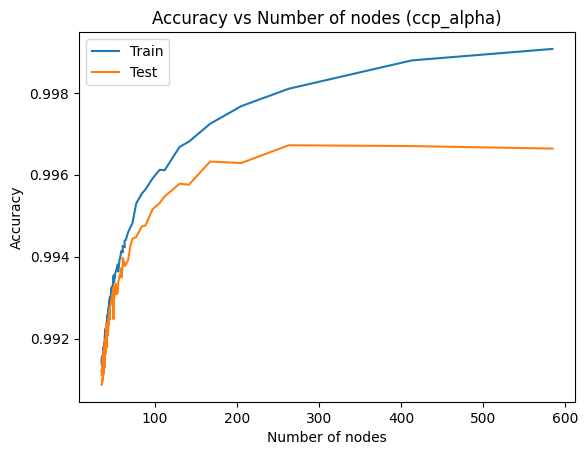

In [ ]:
# Plotting accuracies
plot_train_test_acc(train_acc, test_acc, num_of_nodes, 'ccp_alpha')

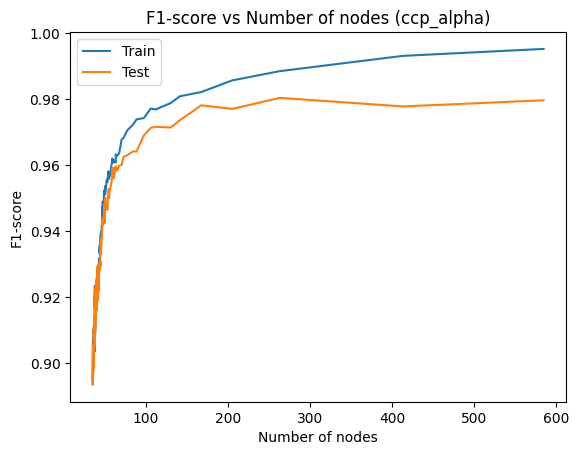

In [ ]:
# Plotting F1-score
plot_train_test_f1(train_f1, test_f1, num_of_nodes, 'ccp_alpha')

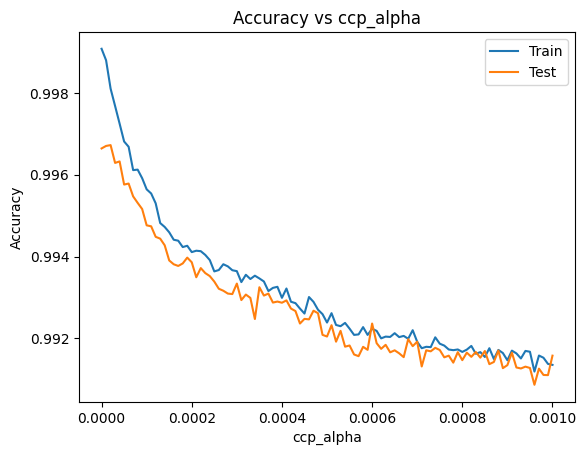

In [ ]:
# Plotting Accuracy against min_sample_split
plot_train_test_acc_values(train_acc, test_acc, values, 'ccp_alpha')

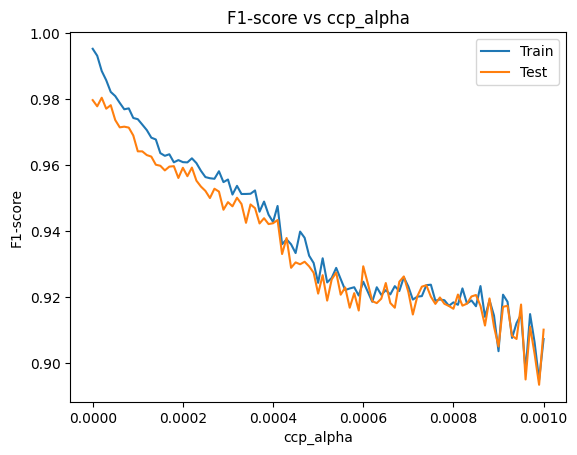

In [ ]:
# Plotting F1-score against min_sample_split
plot_train_test_f1_values(train_f1, test_f1, values, 'ccp_alpha')

In [ ]:
temp0 = np.array(num_of_nodes)
temp1 = temp0[temp0 >= 75]
temp2 = temp1[temp1 <= 175]
temp2

array([167.4, 141.6, 130.2, 112. , 106. ,  97.4,  88.6,  84.2,  77.4])

In [ ]:
num_of_nodes.index(temp2[0])

4

In [ ]:
num_of_nodes.index(temp2[-1])

12

In [ ]:
num_of_nodes[4:13]

[167.4, 141.6, 130.2, 112.0, 106.0, 97.4, 88.6, 84.2, 77.4]

In [ ]:
np.array(values[4:13])

array([4.0e-05, 5.0e-05, 6.0e-05, 7.0e-05, 8.0e-05, 9.0e-05, 1.0e-04,
       1.1e-04, 1.2e-04])

In [ ]:
test_acc[4:13]

[0.9963227824956322,
 0.9957579943927511,
 0.9957823737353217,
 0.9954695055056682,
 0.9953110397789606,
 0.9951607004997765,
 0.9947625045711268,
 0.9947381252285563,
 0.9944821421315673]

In [ ]:
test_f1[4:13]

[0.9782124485686102,
 0.9737067940868208,
 0.9714930322141425,
 0.9716999205029204,
 0.9714166302778053,
 0.9690271891256208,
 0.9642227900946928,
 0.9642106159808908,
 0.9630850986149164]

In [ ]:
# at index 5, we get the best F1-score trade off. We dont take index 4 since the increase in number of nodes is much higher than the increase in accuracy
# ccp_alpha at 5:
values[5]

5e-05

In [ ]:
num_of_nodes[5]

141.6

In [ ]:
test_acc[5]

0.9957579943927511

In [ ]:
test_f1[5]

0.9737067940868208

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectPercentile

def FindPercentile(X, y):
  max_range = 100
  values = np.array(range(5,max_range+1, 5))
  itr_values = tqdm(values)
  train_acc = []
  test_acc = []
  train_f1 = []
  test_f1 = []
  # num_of_nodes = []
  for i in itr_values:
    train_acc_temp = []
    test_acc_temp = []
    train_f1_temp = []
    test_f1_temp = []
    X_new = SelectPercentile(percentile=i).fit_transform(X,y)
    # num_of_nodes_temp = []
    for j in range(10):
      X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, stratify=y)
      clf = DecisionTreeClassifier(ccp_alpha=0.00008)
      clf.fit(X_train, y_train)
      y_train_pred = clf.predict(X_train)
      y_test_pred = clf.predict(X_test)
      train_acc_temp.append(accuracy_score(y_train, y_train_pred))
      test_acc_temp.append(accuracy_score(y_test, y_test_pred))
      train_f1_temp.append(f1_score(y_train, y_train_pred, average='macro'))
      test_f1_temp.append(f1_score(y_test, y_test_pred, average='macro'))
      # num_of_nodes_temp.append(clf.tree_.node_count)
    train_acc.append(np.mean(train_acc_temp))
    test_acc.append(np.mean(test_acc_temp))
    train_f1.append(np.mean(train_f1_temp))
    test_f1.append(np.mean(test_f1_temp))
    # num_of_nodes.append(np.mean(num_of_nodes_temp))
  return train_acc, test_acc, train_f1, test_f1, values

In [ ]:
import warnings

# Ignore specific warnings
warnings.filterwarnings("ignore", message="Features .* are constant.", category=UserWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in divide", category=RuntimeWarning)

In [ ]:
# Find best percentile
train_acc, test_acc, train_f1, test_f1, values = FindPercentile(X,y)

100%|██████████| 20/20 [02:19<00:00,  6.96s/it]


<BarContainer object of 20 artists>

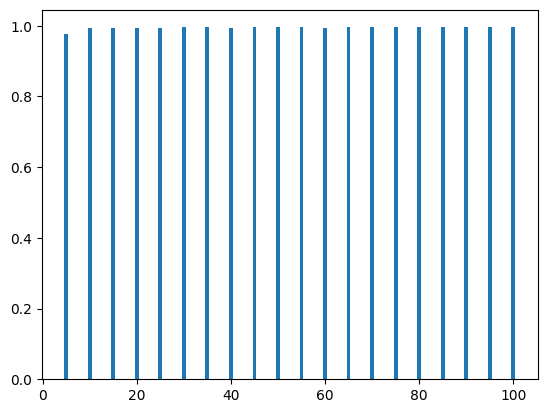

In [ ]:
plt.bar(values, test_acc)

<BarContainer object of 20 artists>

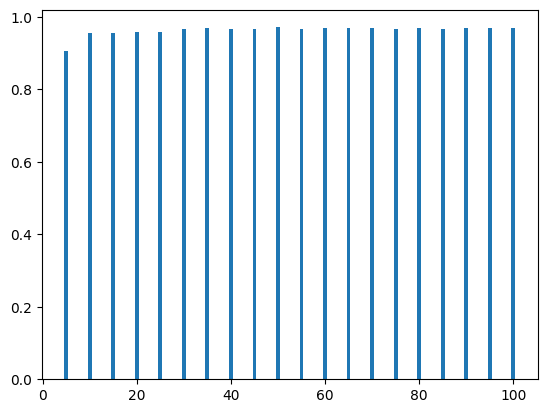

In [ ]:
plt.bar(values, test_f1)

In [ ]:
print(f"Max avg test_acc = {np.max(test_acc)} at the {values[np.argmax(test_acc)]}th percentile")
print(f"Max avg test_f1 = {np.max(test_f1)} at the {values[np.argmax(test_f1)]}th percentile")

Max avg test_acc = 0.9955182641908088 at the 90th percentile
Max avg test_f1 = 0.9711196586547434 at the 50th percentile


### **With Feature Selection**

In [30]:
# With Feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectPercentile


X_new = SelectPercentile(percentile=50).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, stratify=y)
clf_optimal = DecisionTreeClassifier(ccp_alpha=0.00008)
clf_optimal.fit(X_train, y_train)
y_train_pred = clf_optimal.predict(X_train)
y_test_pred = clf_optimal.predict(X_test)
report = classification_report(y_test, y_test_pred, digits=4)
print(report)
y_test_pred_proba = clf_optimal.predict_proba(X_test)
auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')
print(f"Macro avg ROC AUC: {auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [22 90] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

           0     0.9484    0.9852    0.9665      1550
           1     0.9369    0.9720    0.9541       107
           2     1.0000    1.0000    1.0000     18932
           3     1.0000    0.9988    0.9994       829
           4     0.9950    1.0000    0.9975       400
           5     1.0000    0.9900    0.9950       200
           6     0.9864    0.9788    0.9826       518
           7     1.0000    1.0000    1.0000       402
           8     0.9853    0.9525    0.9687      1622
           9     0.9130    0.8235    0.8660        51

    accuracy                         0.9949     24611
   macro avg     0.9765    0.9701    0.9730     24611
weighted avg     0.9950    0.9949    0.9949     24611

Macro avg ROC AUC: 0.9984317402016325


In [31]:
clf_optimal.tree_.node_count # number of nodes

113

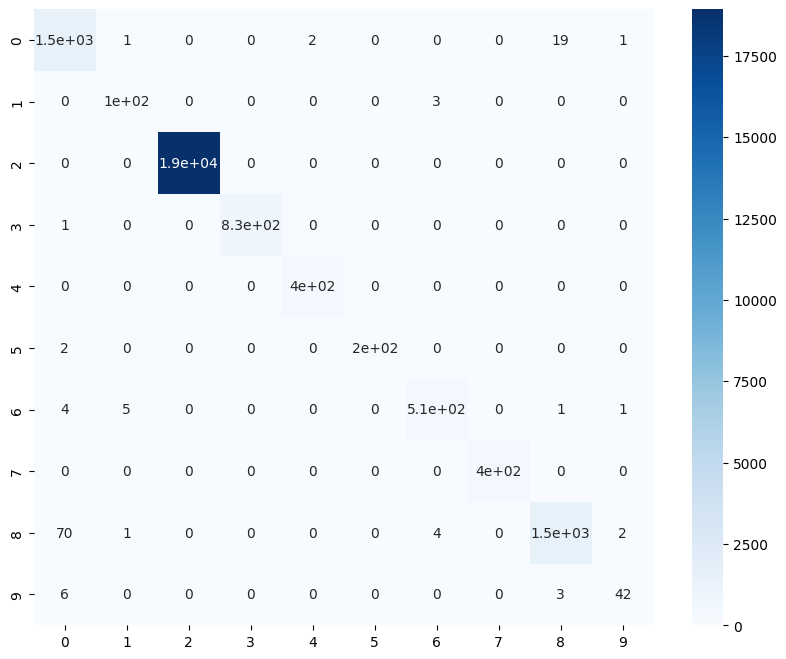

In [32]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
heatmap(cm, cmap='Blues', annot=True)
plt.show()

In [33]:
labelenc.classes_

array(['ARP_poisioning', 'DDOS_Slowloris', 'DOS_SYN_Hping',
       'MQTT_Publish', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 'Thing_Speak',
       'Wipro_bulb'], dtype=object)

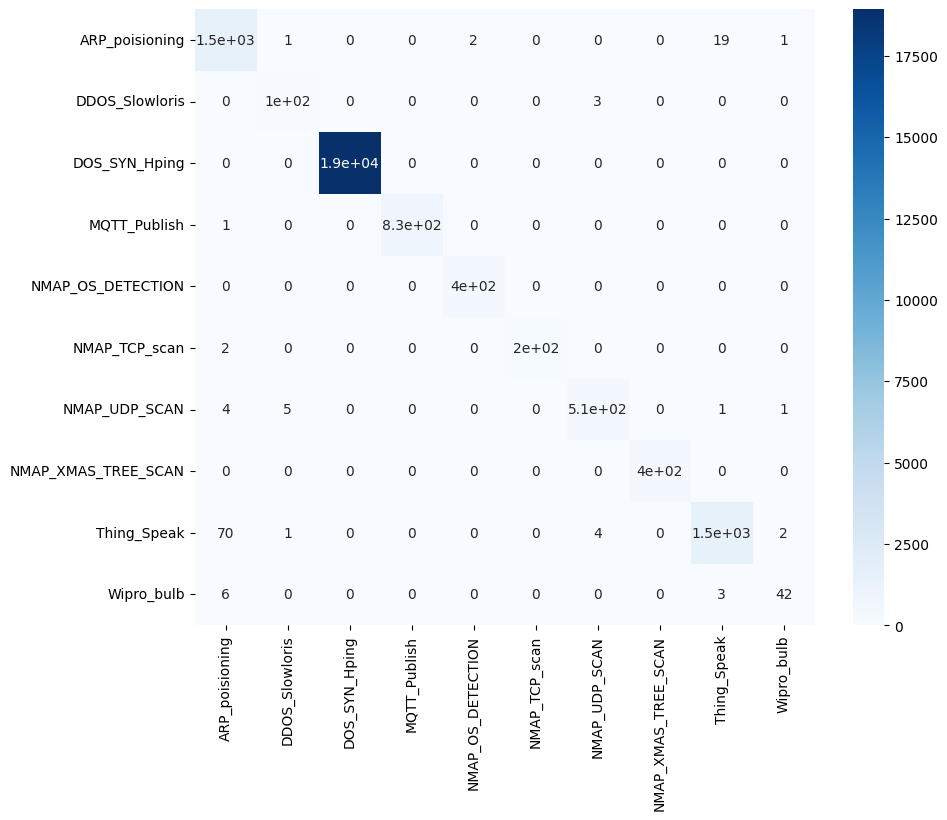

In [34]:
df_cm = pd.DataFrame(cm)
df_cm.columns = labelenc.classes_
df_cm = df_cm.set_index(labelenc.classes_)
plt.figure(figsize=(10,8))
heatmap(df_cm, cmap='Blues', annot=True)
# plt.title('Confusion Matrix for unbalanced data')
plt.show()

### **Without Feature Selection**

In [38]:
# Without Feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectPercentile


# X_new = SelectPercentile(percentile=50).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
clf_optimal = DecisionTreeClassifier(ccp_alpha=0.00008)
clf_optimal.fit(X_train, y_train)
y_train_pred = clf_optimal.predict(X_train)
y_test_pred = clf_optimal.predict(X_test)
report = classification_report(y_test, y_test_pred, digits=4)
print(report)
y_test_pred_proba = clf_optimal.predict_proba(X_test)
auc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')
print(f"Macro avg ROC AUC: {auc}")

              precision    recall  f1-score   support

           0     0.9632    0.9806    0.9719      1550
           1     0.9091    0.9346    0.9217       107
           2     1.0000    1.0000    1.0000     18932
           3     0.9964    1.0000    0.9982       829
           4     0.9975    1.0000    0.9988       400
           5     1.0000    0.9950    0.9975       200
           6     0.9902    0.9710    0.9805       518
           7     1.0000    1.0000    1.0000       402
           8     0.9813    0.9686    0.9749      1622
           9     0.9167    0.8627    0.8889        51

    accuracy                         0.9955     24611
   macro avg     0.9754    0.9713    0.9732     24611
weighted avg     0.9955    0.9955    0.9955     24611

Macro avg ROC AUC: 0.9986354920845887


In [39]:
clf_optimal.tree_.node_count # number of nodes

107

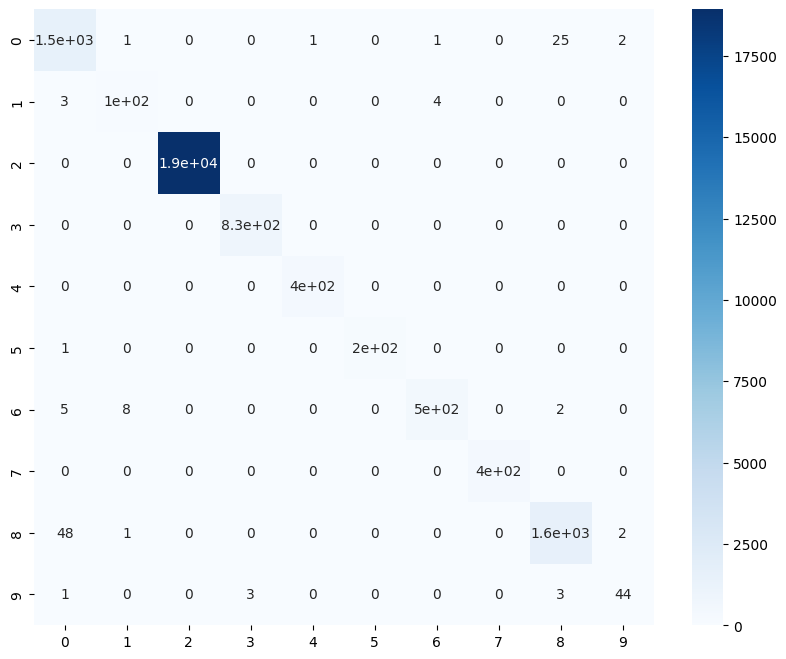

In [40]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
heatmap(cm, cmap='Blues', annot=True)
plt.show()

In [41]:
labelenc.classes_

array(['ARP_poisioning', 'DDOS_Slowloris', 'DOS_SYN_Hping',
       'MQTT_Publish', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 'Thing_Speak',
       'Wipro_bulb'], dtype=object)

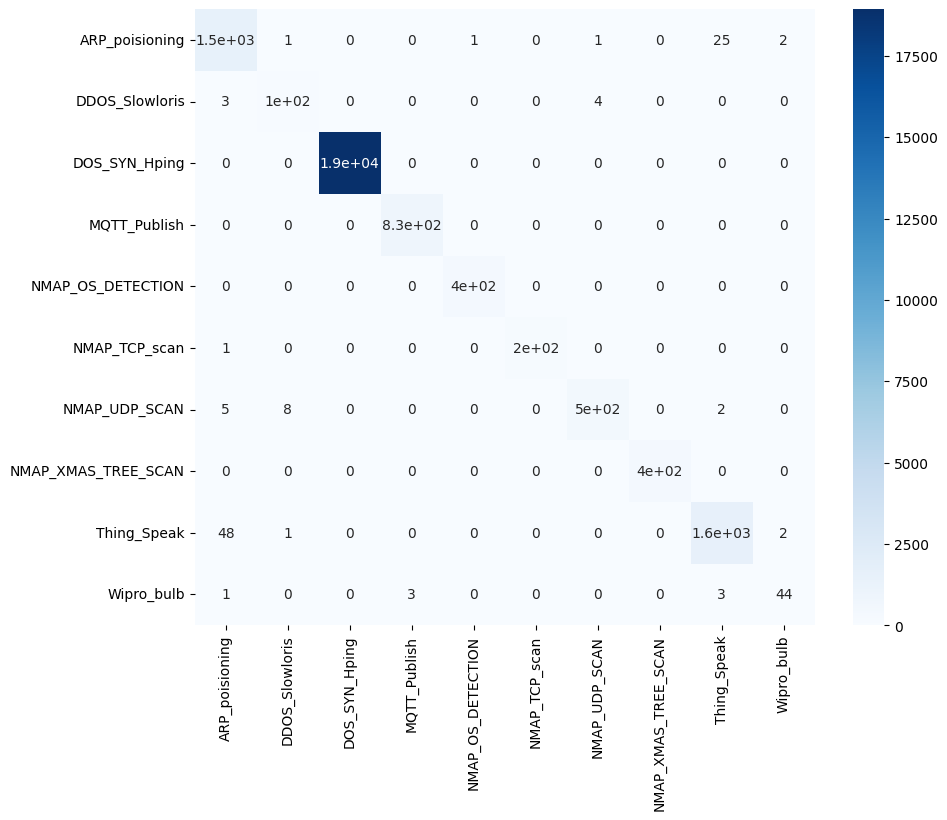

In [42]:
df_cm = pd.DataFrame(cm)
df_cm.columns = labelenc.classes_
df_cm = df_cm.set_index(labelenc.classes_)
plt.figure(figsize=(10,8))
heatmap(df_cm, cmap='Blues', annot=True)
# plt.title('Confusion Matrix for unbalanced data')
plt.show()